In [7]:
# !pip install seaborn
# !pip install blackcellmagic

# !pip install jupyter_contrib_nbextensions
# !jupyter contrib nbextension install --user

# !pip install jupyter_nbextensions_configurator
# !jupyter nbextensions_configurator enable --user

# !jupyter nbextension install https://github.com/drillan/jupyter-black/archive/master.zip --user
# !jupyter nbextension enable jupyter-black-master/jupyter-black

In [8]:
# import tensorflow as tf

# tf.enable_eager_execution()

In [279]:
import matplotlib.pyplot as plt
from matplotlib.colors import DivergingNorm, cnames

import numpy as np
import pandas as pd

import h5py

import pickle
import cv2
import os

import PIL

# import time
import pathlib

from sklearn.decomposition import PCA, FastICA

from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, r2_score

from pandas.plotting import scatter_matrix

from scipy.stats import gaussian_kde
from scipy.signal import find_peaks, argrelmax

from math import sqrt

from itertools import combinations, combinations_with_replacement

from cycler import cycler


from time import time

from matplotlib.ticker import NullFormatter

# from sklearn.manifold import TSNE
from sklearn.cluster import OPTICS, cluster_optics_dbscan

from sklearn.cluster import Birch, MiniBatchKMeans, KMeans
from itertools import cycle

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.neighbors import NearestNeighbors

from mpl_toolkits.mplot3d import Axes3D

from scipy.spatial import KDTree

import seaborn as sns
from matplotlib.colors import ListedColormap

from matplotlib.gridspec import GridSpec
from matplotlib.path import Path

from scipy.stats import normaltest, mannwhitneyu

In [10]:
pd.set_option("display.float_format", lambda x: "{:.3f}".format(x))

df = pd.read_csv("/data/fp_tsne.csv")
df = df.set_index("ID")

display(df[:10])
# display(df.describe().T)

col_factors = ["factor{}".format(i) for i in range(7)]
col_attributes = [
    "year",
    "N_Housings",
    "N_Units",
    "Max_Floors",
    "Area",
    "Rooms",
    "Baths",
]

Unnamed: 0  true_year  prediction  row  factor0  factor1  factor2  \
ID                                                                              
2829_105             0      0.520       0.564    0    0.611    1.785   -0.388   
999_37               1      0.360       0.407    1   -2.766   -0.138   -0.335   
7770_55A             2      0.200       0.392    2   -4.549    0.465    1.008   
2140_92B             3      0.520       0.500    3   -0.829    1.609    0.456   
509_73               4      0.500       0.486    4   -0.539    1.325   -0.499   
19478_113            5      0.740       0.750    5   -0.055   -0.499    0.356   
8657_70              6      0.360       0.408    6   -3.012    0.229   -0.304   
1856_61              7      0.400       0.461    7   -2.442    0.647    0.642   
25606_107C           8      0.740       0.726    8    0.198    0.026    0.414   
27502_140B           9      0.840       0.780    9    0.512   -0.255    0.544   

            factor3  factor4  factor5  ...  sido_cluster    Area  \
ID                                     ...                         
2829_105     -0.324    0.403   -0.914  ...            경기  84.690   
999_37        0.763    0.294    1.408  ...            서울  27.610   
7770_55A     -0.274   -0.669   -0.723  ...        부산울산경남  41.520   
2140_92B     -0.606   -0.178    0.384  ...            경기  67.430   
509_73        0.784    0.302   -0.240  ...            서울  52.470   
19478_113    -1.959    0.827    0.324  ...            강원  84.710   
8657_70      -0.009    0.197    0.447  ...            경기  53.190   
1856_61      -0.463    0.314    0.458  ...            경기  45.900   
25606_107C   -0.265    1.089   -2.190  ...            경기  84.270   
27502_140B   -0.059   -0.924   -0.956  ...            서울 114.900   

            norm_log_area  area_85  Entrance  Rooms  Baths group_area   tsne0  \
ID                                                                              
2829_105           -0.010     True       복도식      3      2       85m2  17.511   
999_37             -3.228    False       복도식      1      1        NaN -34.132   
7770_55A           -2.057    False       복도식      2      1        NaN -49.837   
2140_92B           -0.665    False       계단식      3      1       60m2 -13.985   
509_73             -1.385    False       복도식      2      1       60m2  -9.185   
19478_113          -0.010     True       계단식      3      2       85m2  33.671   
8657_70            -1.346    False       계단식      3      1       60m2 -37.420   
1856_61            -1.769    False       계단식      3      1       60m2 -31.818   
25606_107C         -0.025     True       계단식      3      2       85m2  24.476   
27502_140B          0.865    False       계단식      4      2      Above  32.229   

             tsne1  
ID                  
2829_105   -49.942  
999_37     -26.655  
7770_55A   -35.383  
2140_92B   -55.294  
509_73     -50.509  
19478_113   45.368  
8657_70    -30.588  
1856_61    -42.848  
25606_107C  11.676  
27502_140B   4.493  

[10 rows x 31 columns]

In [11]:
df.describe().T

count           mean            std            min  \
Unnamed: 0        50540.000      25269.500      14589.786          0.000   
true_year         50540.000          0.701          0.169          0.000   
prediction        50540.000          0.700          0.153         -1.194   
row               50540.000      25269.500      14589.786          0.000   
factor0           50540.000         -0.000          1.000         -5.706   
factor1           50540.000          0.000          1.000         -3.034   
factor2           50540.000          0.000          1.000        -50.346   
factor3           50540.000         -0.000          1.000         -4.265   
factor4           50540.000          0.000          1.000         -6.852   
factor5           50540.000          0.000          1.000         -5.989   
factor6           50540.000         -0.000          1.000         -2.324   
year              50540.000       2004.042          8.469       1969.000   
N_Housings        50540.000        613.525        606.807          2.000   
N_Units           50540.000        125.143        162.483          0.000   
Max_Floors        50540.000         19.087          8.367          3.000   
Min_Floors        50540.000         12.957          6.441          1.000   
sgg               50540.000 2956972307.083 1334933676.814 1111000000.000   
sido              50540.000 2923634744.757 1342974669.592 1100000000.000   
sido_cluster_code 50540.000          2.194          2.279          0.000   
Area              50540.000         89.588         36.372         10.930   
norm_log_area     50540.000         -0.092          1.236         -5.889   
Rooms             50540.000          3.104          0.779          1.000   
Baths             50540.000          1.776          0.472          1.000   
tsne0             50540.000         -0.279         29.905        -64.364   
tsne1             50540.000         -0.027         29.454        -63.283   

                             25%            50%            75%            max  
Unnamed: 0             12634.750      25269.500      37904.250      50539.000  
true_year                  0.580          0.720          0.820          1.000  
prediction                 0.581          0.731          0.818          0.976  
row                    12634.750      25269.500      37904.250      50539.000  
factor0                   -0.115          0.192          0.518          8.992  
factor1                   -0.794         -0.295          0.945          2.902  
factor2                   -0.175          0.079          0.335          2.597  
factor3                   -0.427          0.113          0.588          3.586  
factor4                   -0.498          0.121          0.657          3.161  
factor5                   -0.597          0.014          0.575          5.242  
factor6                   -0.585         -0.263          0.195          6.914  
year                    1998.000       2005.000       2010.000       2019.000  
N_Housings               214.000        450.000        802.000       6864.000  
N_Units                   24.000         72.000        162.000       2960.000  
Max_Floors                15.000         18.000         23.000         80.000  
Min_Floors                 9.000         12.000         16.000         61.000  
sgg               1168000000.000 2920000000.000 4139000000.000 5013000000.000  
sido              1100000000.000 2900000000.000 4100000000.000 5000000000.000  
sido_cluster_code          0.000          1.000          4.000          8.000  
Area                      60.498         84.870        107.422        296.630  
norm_log_area             -0.976         -0.004          0.672          3.588  
Rooms                      3.000          3.000          3.000          7.000  
Baths                      2.000          2.000          2.000          5.000  
tsne0                    -23.442          0.365         23.116         59.763  
tsne1                    -24.271          1.4

In [12]:
df[col_factors].describe()

factor0   factor1   factor2   factor3   factor4   factor5   factor6
count 50540.000 50540.000 50540.000 50540.000 50540.000 50540.000 50540.000
mean     -0.000     0.000     0.000    -0.000     0.000     0.000    -0.000
std       1.000     1.000     1.000     1.000     1.000     1.000     1.000
min      -5.706    -3.034   -50.346    -4.265    -6.852    -5.989    -2.324
25%      -0.115    -0.794    -0.175    -0.427    -0.498    -0.597    -0.585
50%       0.192    -0.295     0.079     0.113     0.121     0.014    -0.263
75%       0.518     0.945     0.335     0.588     0.657     0.575     0.195
max       8.992     2.902     2.597     3.586     3.161     5.242     6.914

In [13]:
X = df[col_factors]
X.corr()

factor0  factor1  factor2  factor3  factor4  factor5  factor6
factor0    1.000   -0.000   -0.000   -0.000    0.000    0.000    0.000
factor1   -0.000    1.000    0.000   -0.000   -0.000   -0.000   -0.000
factor2   -0.000    0.000    1.000    0.000   -0.000    0.000    0.000
factor3   -0.000   -0.000    0.000    1.000   -0.000   -0.000   -0.000
factor4    0.000   -0.000   -0.000   -0.000    1.000   -0.000    0.000
factor5    0.000   -0.000    0.000   -0.000   -0.000    1.000    0.000
factor6    0.000   -0.000    0.000   -0.000    0.000    0.000    1.000

# Floorplans as a single cluster

In [36]:
clust = OPTICS(min_cluster_size=0.001)
clust.fit(X)

/usr/local/lib/python3.6/dist-packages/sklearn/cluster/optics_.py:795: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


OPTICS(algorithm='auto', cluster_method='xi', eps=None, leaf_size=30,
       max_eps=inf, metric='minkowski', metric_params=None,
       min_cluster_size=0.001, min_samples=5, n_jobs=None, p=2,
       predecessor_correction=True, xi=0.05)

In [37]:
pd.DataFrame(clust.labels_).describe()

0
count 50540.000
mean     -0.001
std       0.034
min      -1.000
25%       0.000
50%       0.000
75%       0.000
max       0.000

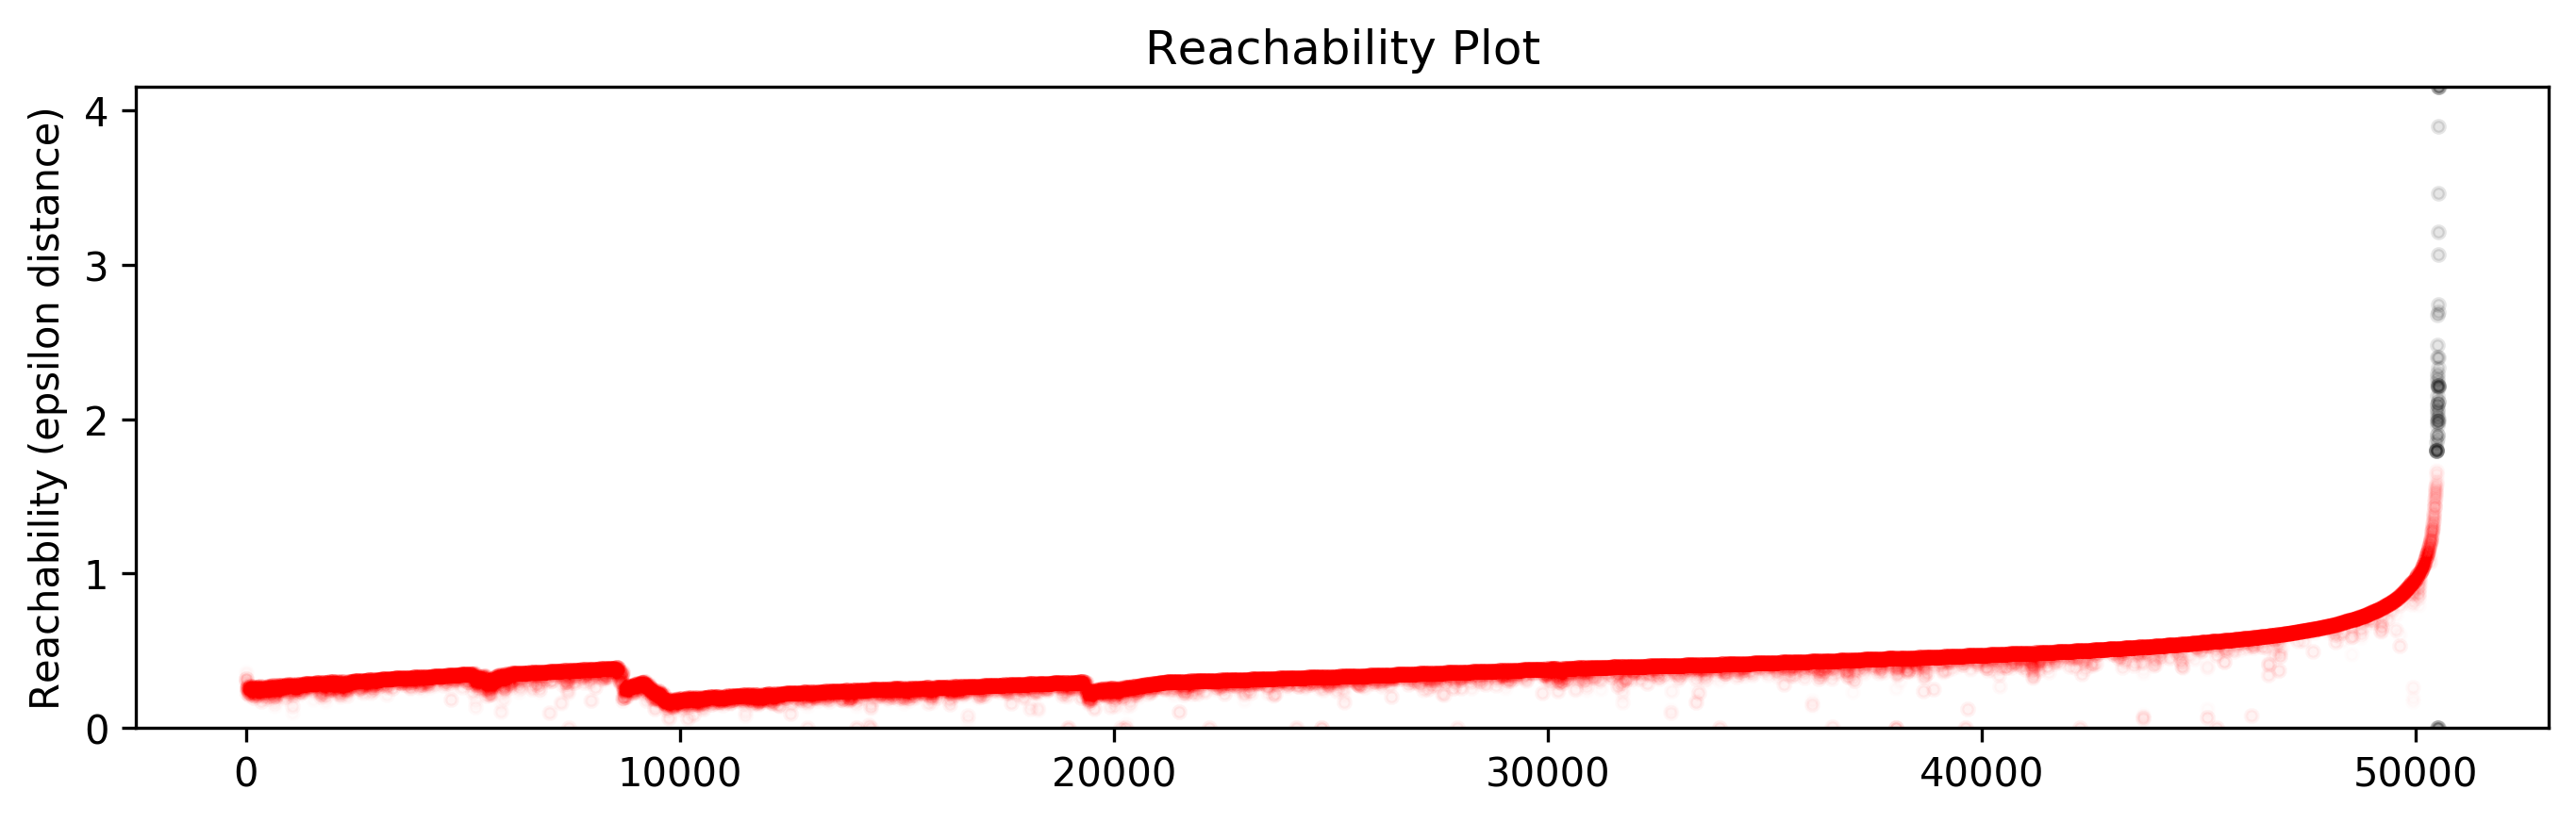

In [78]:
space = np.arange(len(X))
reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]

fig = plt.figure(figsize=(11, 3), dpi=300)
ax = fig.gca()

ax.plot(space[labels == 0], reachability[labels == 0], "r.", alpha=0.01)
ax.plot(space[labels == -1], reachability[labels == -1], "k.", alpha=0.1)

ax.set_ylabel("Reachability (epsilon distance)")
ax.set_title("Reachability Plot")
ax.set_ylim(0, np.quantile(reachability, 0.9999))

fig.savefig("optics.png", dpi=300, bbox_inches="tight")

# Representative floorplans

## Finding the right number of clusters

In [63]:
range_n_clusters = list(range(2, 400))

inertias = []
silhouettes = []
for n_clusters in range_n_clusters:
    t0 = time()

    model = MiniBatchKMeans(
        init="k-means++", n_clusters=n_clusters, batch_size=1000, random_state=1106
    )
    model.fit(X)

    labels = model.labels_

    inertias.append(model.inertia_)

    t1 = time()

    silhouette_avg = silhouette_score(X, labels, sample_size=5054, random_state=1106)
    silhouettes.append(silhouette_avg)

    t2 = time()

    print(
        "For n_clusters =",
        n_clusters,
        "The sum of square distances from center =",
        model.inertia_,
        "The average silhouette_score is :",
        silhouette_avg,
        f"Time: {t1-t0:0.2f}+{t2-t1:0.2f}",
    )

For n_clusters = 2 The sum of square distances from center = 313812.9378178421 The average silhouette_score is : 0.16802229414488157 Time: 0.05+0.37
For n_clusters = 3 The sum of square distances from center = 280843.0199053005 The average silhouette_score is : 0.17873292682738634 Time: 0.05+0.37
For n_clusters = 4 The sum of square distances from center = 249149.05697165345 The average silhouette_score is : 0.20116364385468902 Time: 0.05+0.37
For n_clusters = 5 The sum of square distances from center = 220058.24646138222 The average silhouette_score is : 0.23212523683625258 Time: 0.06+0.37
For n_clusters = 6 The sum of square distances from center = 190565.43022489187 The average silhouette_score is : 0.24302125454593754 Time: 0.07+0.37
For n_clusters = 7 The sum of square distances from center = 166412.68539684667 The average silhouette_score is : 0.24665053602521053 Time: 0.06+0.37
For n_clusters = 8 The sum of square distances from center = 147468.45051154203 The average silhouette

For n_clusters = 57 The sum of square distances from center = 59252.81662783334 The average silhouette_score is : 0.14900525371046747 Time: 0.25+0.39
For n_clusters = 58 The sum of square distances from center = 58780.04273262575 The average silhouette_score is : 0.14792662811043336 Time: 0.32+0.39
For n_clusters = 59 The sum of square distances from center = 61006.828335998856 The average silhouette_score is : 0.14425449927175416 Time: 0.28+0.39
For n_clusters = 60 The sum of square distances from center = 59146.704568758294 The average silhouette_score is : 0.14197424744473058 Time: 0.33+0.39
For n_clusters = 61 The sum of square distances from center = 58145.21959506364 The average silhouette_score is : 0.14436218817649363 Time: 0.23+0.39
For n_clusters = 62 The sum of square distances from center = 57126.329646545804 The average silhouette_score is : 0.14942148845965872 Time: 0.34+0.39
For n_clusters = 63 The sum of square distances from center = 59240.51543253294 The average silho

For n_clusters = 112 The sum of square distances from center = 44985.32965214679 The average silhouette_score is : 0.12709077021749238 Time: 0.54+0.39
For n_clusters = 113 The sum of square distances from center = 45294.37717194534 The average silhouette_score is : 0.12916629887333278 Time: 0.48+0.39
For n_clusters = 114 The sum of square distances from center = 43981.143631221974 The average silhouette_score is : 0.1315143591068128 Time: 0.39+0.39
For n_clusters = 115 The sum of square distances from center = 44493.836369640005 The average silhouette_score is : 0.12312341043709797 Time: 0.40+0.39
For n_clusters = 116 The sum of square distances from center = 44604.97575615978 The average silhouette_score is : 0.13290692262466444 Time: 0.58+0.39
For n_clusters = 117 The sum of square distances from center = 44620.65319779129 The average silhouette_score is : 0.12675500507216741 Time: 0.56+0.39
For n_clusters = 118 The sum of square distances from center = 44279.522438407344 The average

For n_clusters = 167 The sum of square distances from center = 38518.564662579985 The average silhouette_score is : 0.11952102814233256 Time: 0.79+0.41
For n_clusters = 168 The sum of square distances from center = 38930.84470746664 The average silhouette_score is : 0.12044047386178666 Time: 1.60+0.39
For n_clusters = 169 The sum of square distances from center = 37303.810276946395 The average silhouette_score is : 0.12318192326672749 Time: 1.69+0.39
For n_clusters = 170 The sum of square distances from center = 37256.10217023001 The average silhouette_score is : 0.12390035173986344 Time: 1.72+0.39
For n_clusters = 171 The sum of square distances from center = 37059.96617012415 The average silhouette_score is : 0.12844334815229505 Time: 1.74+0.39
For n_clusters = 172 The sum of square distances from center = 36938.34017146705 The average silhouette_score is : 0.12251743835890856 Time: 2.13+0.39
For n_clusters = 173 The sum of square distances from center = 37242.70543095963 The average

For n_clusters = 222 The sum of square distances from center = 34076.186946915295 The average silhouette_score is : 0.11972325048222549 Time: 2.10+0.39
For n_clusters = 223 The sum of square distances from center = 33992.2537935082 The average silhouette_score is : 0.1102201832702845 Time: 0.89+0.39
For n_clusters = 224 The sum of square distances from center = 34008.544372906406 The average silhouette_score is : 0.11275278262502403 Time: 0.93+0.41
For n_clusters = 225 The sum of square distances from center = 34004.03846296103 The average silhouette_score is : 0.11265600775266522 Time: 0.88+0.39
For n_clusters = 226 The sum of square distances from center = 33830.85629166443 The average silhouette_score is : 0.11211184938386744 Time: 0.90+0.39
For n_clusters = 227 The sum of square distances from center = 33747.827703738665 The average silhouette_score is : 0.11235492293085428 Time: 0.89+0.39
For n_clusters = 228 The sum of square distances from center = 33729.36623488932 The average 

For n_clusters = 277 The sum of square distances from center = 30929.851404277502 The average silhouette_score is : 0.10609048310403972 Time: 1.10+0.41
For n_clusters = 278 The sum of square distances from center = 32363.922363460417 The average silhouette_score is : 0.10386925124560045 Time: 1.02+0.39
For n_clusters = 279 The sum of square distances from center = 30991.19903736163 The average silhouette_score is : 0.10489204262424495 Time: 1.01+0.39
For n_clusters = 280 The sum of square distances from center = 32305.195121569326 The average silhouette_score is : 0.10262334247302511 Time: 1.02+0.39
For n_clusters = 281 The sum of square distances from center = 30887.682959169986 The average silhouette_score is : 0.1035782674674031 Time: 1.01+0.39
For n_clusters = 282 The sum of square distances from center = 30790.799270190215 The average silhouette_score is : 0.1058379289640144 Time: 1.02+0.39
For n_clusters = 283 The sum of square distances from center = 30758.496181788712 The avera

For n_clusters = 332 The sum of square distances from center = 29038.25880589581 The average silhouette_score is : 0.0969953567138765 Time: 1.16+0.40
For n_clusters = 333 The sum of square distances from center = 29034.631178202275 The average silhouette_score is : 0.10027387648206747 Time: 1.16+0.39
For n_clusters = 334 The sum of square distances from center = 28907.605886500965 The average silhouette_score is : 0.09693159384003582 Time: 1.14+0.39
For n_clusters = 335 The sum of square distances from center = 28914.177003301018 The average silhouette_score is : 0.0963773655283802 Time: 1.15+0.39
For n_clusters = 336 The sum of square distances from center = 28937.263784089646 The average silhouette_score is : 0.10364869478005279 Time: 2.73+0.39
For n_clusters = 337 The sum of square distances from center = 28549.65283945449 The average silhouette_score is : 0.10607540301588941 Time: 1.68+0.39
For n_clusters = 338 The sum of square distances from center = 28838.30381502144 The average

For n_clusters = 387 The sum of square distances from center = 27593.349469190383 The average silhouette_score is : 0.08989296450333967 Time: 1.26+0.39
For n_clusters = 388 The sum of square distances from center = 27690.014975068123 The average silhouette_score is : 0.09347558560973993 Time: 1.27+0.39
For n_clusters = 389 The sum of square distances from center = 27514.489440949535 The average silhouette_score is : 0.09441487455074589 Time: 1.25+0.39
For n_clusters = 390 The sum of square distances from center = 27524.15381683609 The average silhouette_score is : 0.09487719498063658 Time: 1.25+0.39
For n_clusters = 391 The sum of square distances from center = 27508.050651649224 The average silhouette_score is : 0.09631281971150076 Time: 1.26+0.39
For n_clusters = 392 The sum of square distances from center = 27254.53929079511 The average silhouette_score is : 0.0972681927316367 Time: 1.86+0.39
For n_clusters = 393 The sum of square distances from center = 27546.228902394734 The avera

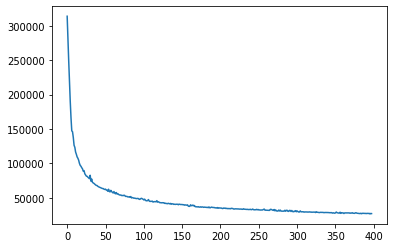

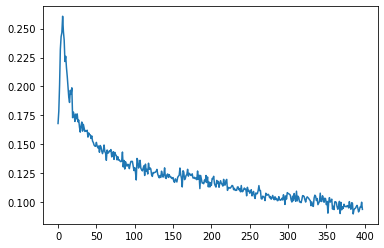

In [64]:
plt.plot(inertias)
plt.show()
plt.plot(silhouettes)
plt.show()

In [65]:
peaks, _ = find_peaks(np.array(silhouettes), distance=10, prominence=0.01)
peaks

array([  6,  18, 103, 118, 159, 169, 262, 311, 342, 354, 380])

In [87]:
# picked_peaks = [0, 1, 5]
picked_peaks = [0, 5]

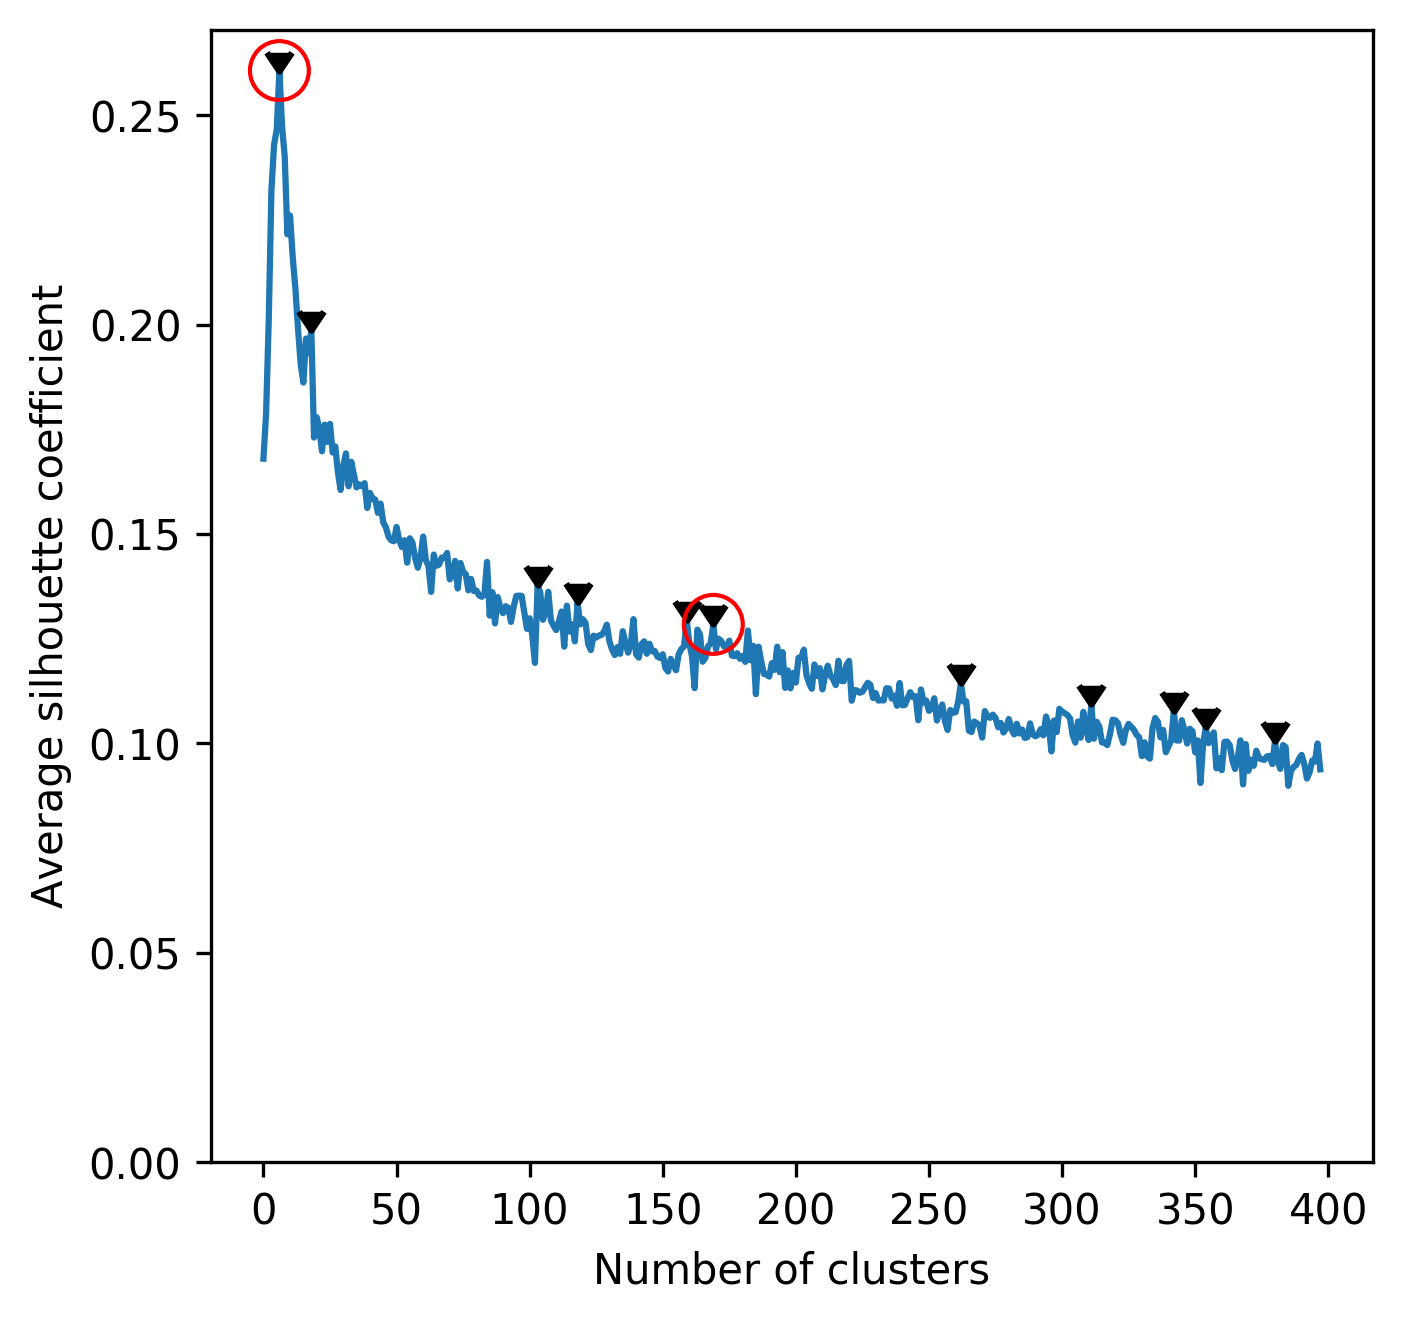

In [91]:
fig = plt.figure(figsize=(5, 5), dpi=300)
plt.plot(silhouettes)
plt.scatter(peaks, np.array(silhouettes)[peaks], marker=7, c="k", zorder=5)

plt.scatter(
    peaks[picked_peaks],
    np.array(silhouettes)[peaks[picked_peaks]],
    marker="o",
    s=200,
    c="None",
    edgecolors="r",
    zorder=10,
)

plt.xlabel("Number of clusters")
plt.ylabel("Average silhouette coefficient")
plt.ylim(bottom=0)

fig.savefig("kmeans_n_clusters.png", dpi=300, bbox_inches="tight")

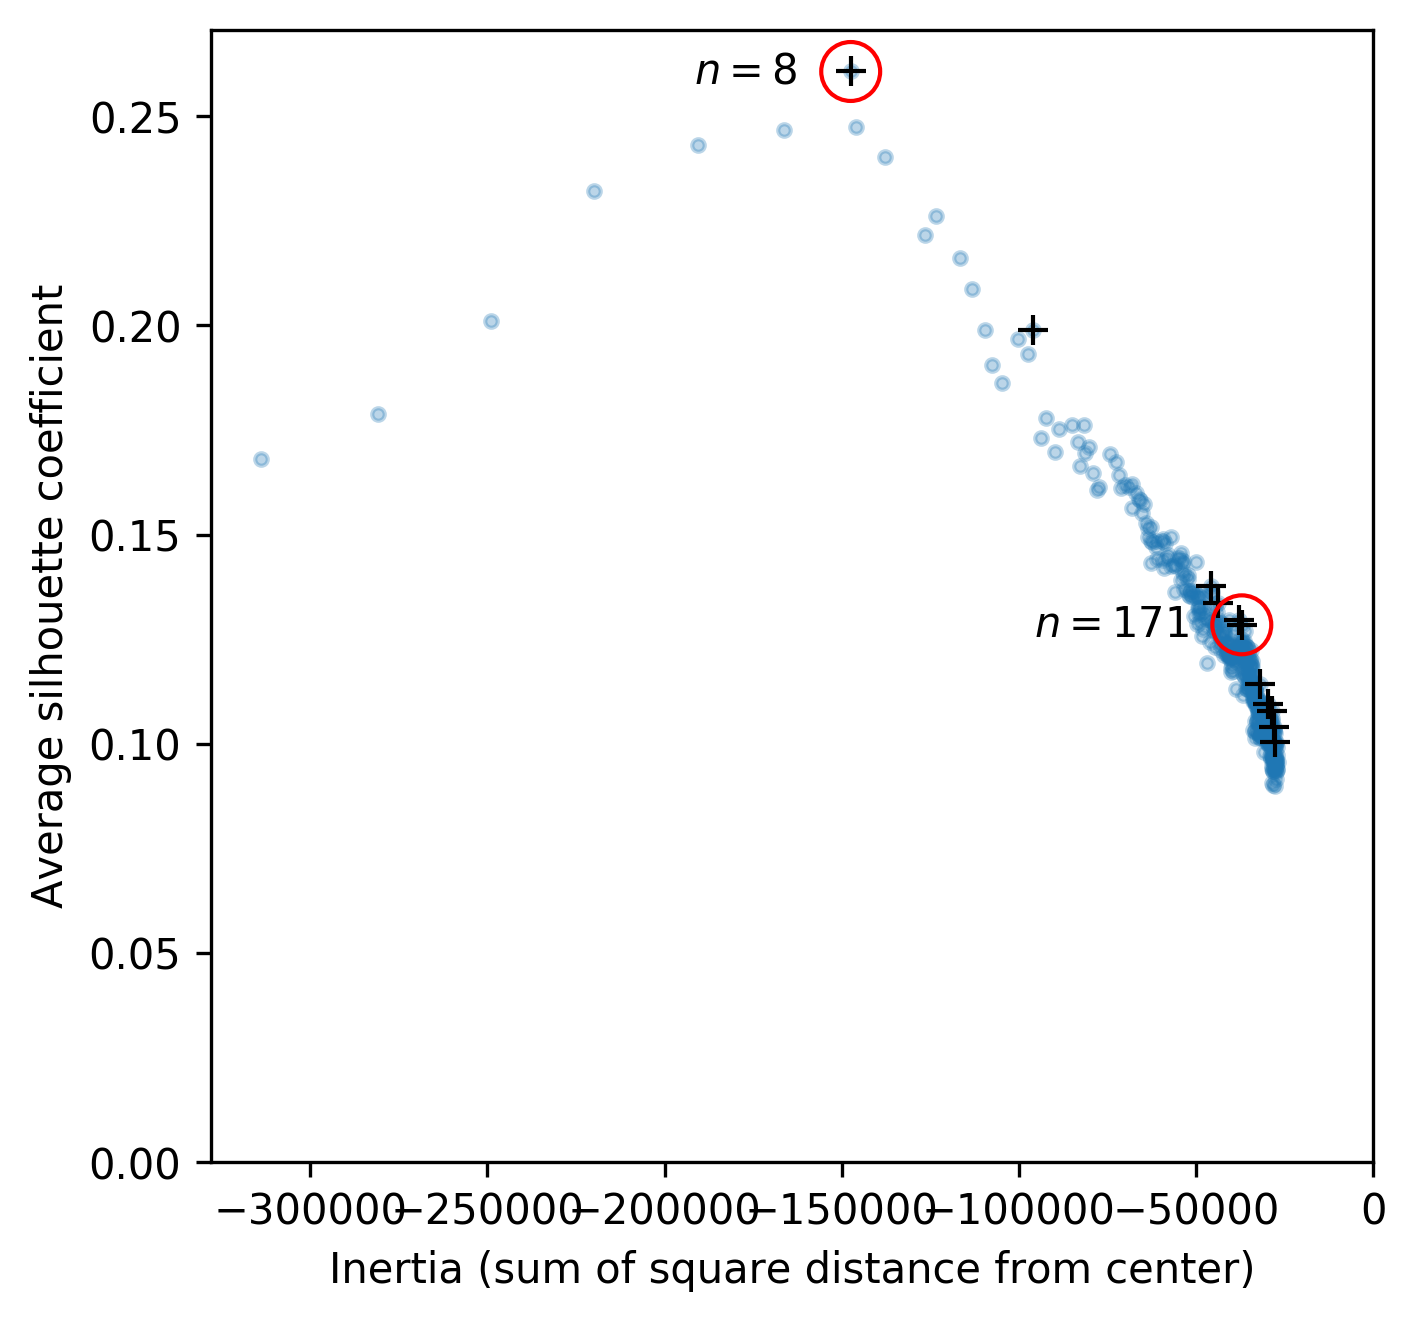

In [96]:
xs = -1 * np.array(inertias)
ys = np.array(silhouettes)

fig = plt.figure(figsize=(5, 5), dpi=300)
plt.scatter(xs, ys, marker=".", alpha=0.3)
plt.scatter(xs[peaks], ys[peaks], marker="+", lw=1, s=50, c="k")
plt.scatter(
    xs[peaks[picked_peaks]],
    ys[peaks[picked_peaks]],
    marker="o",
    s=200,
    c="None",
    edgecolors="r",
)
plt.xlabel("Inertia (sum of square distance from center)")
plt.ylabel("Average silhouette coefficient")
plt.xlim(right=0)
plt.ylim(bottom=0)

ns = np.array(range_n_clusters)
[
    plt.text(x - 15000, y, f"$n={n_cluster}$", ha="right", va="center")
    for x, y, n_cluster in zip(
        xs[peaks[picked_peaks]], ys[peaks[picked_peaks]], ns[peaks[picked_peaks]]
    )
]

fig.savefig("kmeans_silhouette.png", dpi=300, bbox_inches="tight")

## Characteristics of clusters and representative floorplans

In [303]:
picked_n_clusters = [8, 171]

centers_list = []
for i, n_clusters in enumerate(picked_n_clusters):
    model = MiniBatchKMeans(
        init="k-means++", n_clusters=n_clusters, batch_size=1000, random_state=1106
    )
    model.fit(X)

    indexes = np.argsort(df["year"].groupby(model.labels_).mean())
    lookup = np.zeros_like(indexes)
    lookup[indexes] = np.arange(n_clusters)

    df[f"cluster{i}"] = lookup[model.labels_]

    centers_list.append(model.cluster_centers_)

display(pd.DataFrame(centers_list[0]))

df.to_csv("/data/fp_cluster.csv")

0      1       2      3      4      5      6
0 -3.217  0.361  -0.270 -0.008 -0.003  0.005 -0.058
1  0.115 -0.532   0.125 -1.754  0.270  0.068 -0.522
2  0.003  0.102 -15.183  0.159  0.230  0.092  0.005
3  0.311  1.413  -0.077  0.035  0.255  0.407 -0.155
4  0.243 -0.470  -0.050  0.062 -0.014 -0.077  2.233
5  0.210 -0.848   0.132  0.573  0.405  0.380 -0.039
6  0.103 -0.188   0.193  0.357 -1.935  0.060 -0.411
7  0.275 -0.161   0.103  0.523  0.234 -1.307 -0.679

In [135]:
# build KDTree for searching floorplan points
tree = KDTree(X)

# get closest floorplan as representative of 171 clusters
closest_points_indexes = tree.query(centers_list[-1])[1]
df_rep = df.iloc[closest_points_indexes, :]
df_rep[col_factors]

df_rep.to_csv("/data/df_rep.csv")

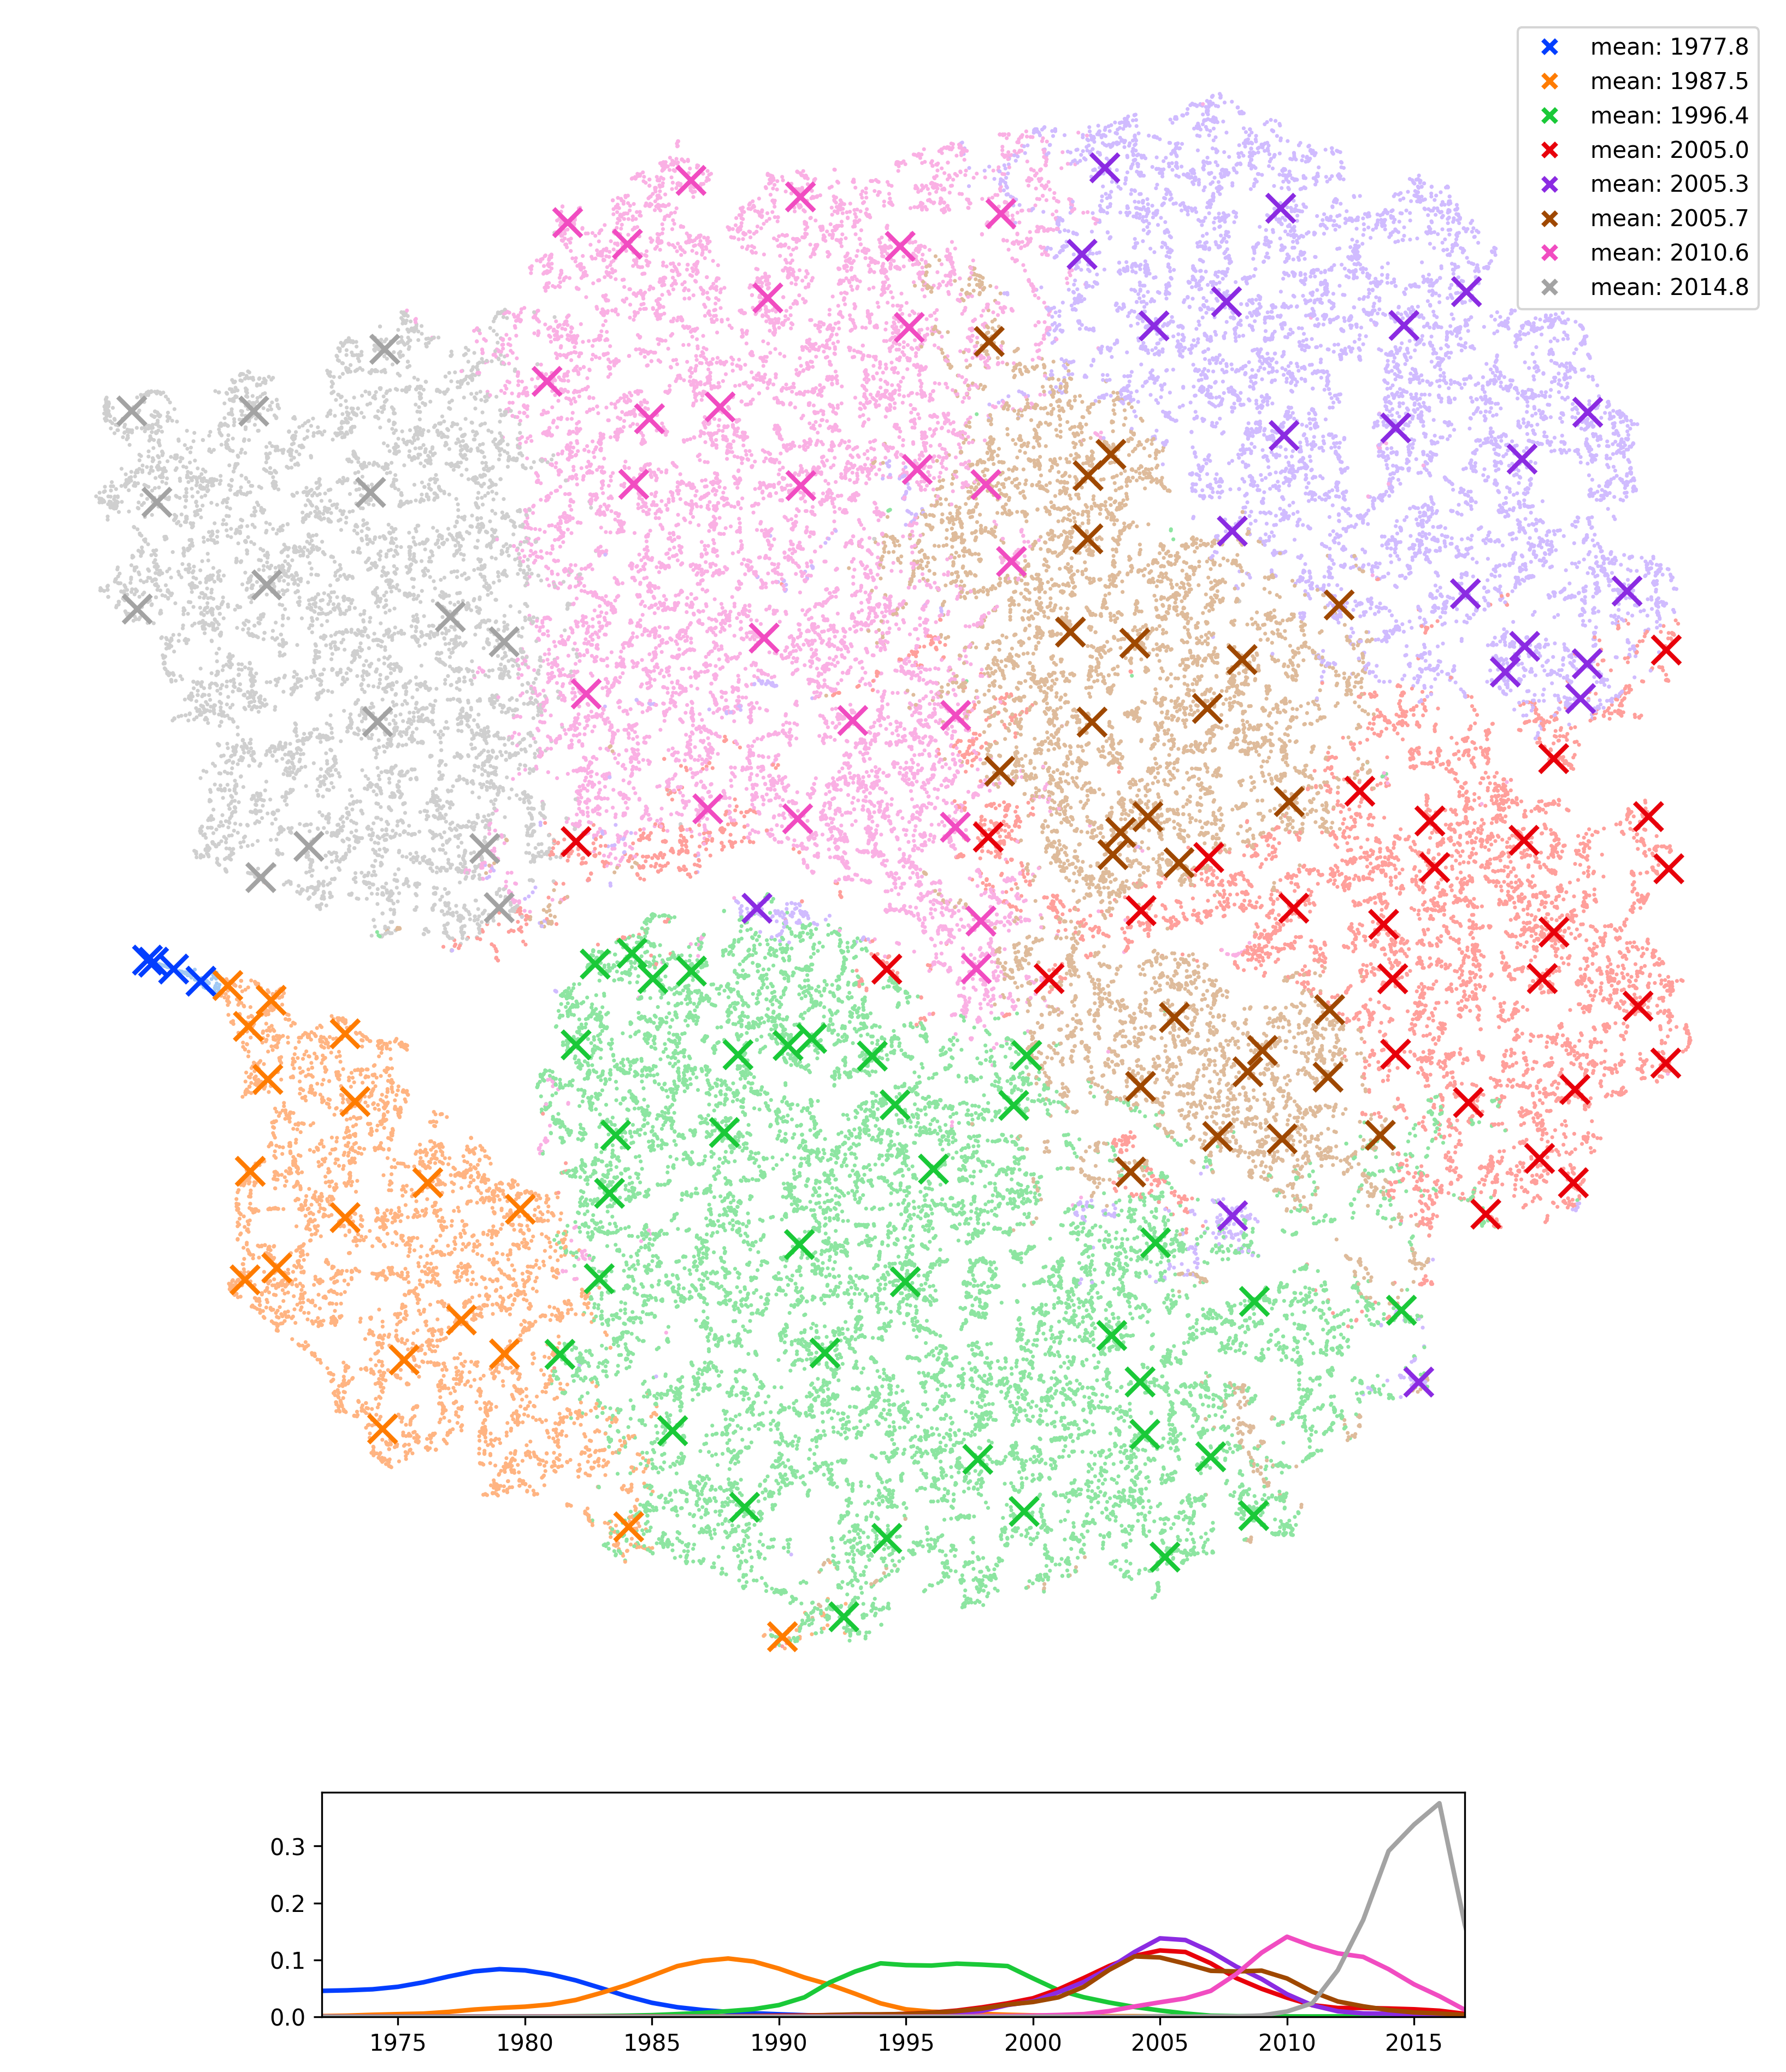

In [136]:
# fig, axes = plt.subplots(2, figsize=(11, 15), dpi=300)

fig = plt.figure(figsize=(11, 13), dpi=300)
gs = GridSpec(2, 3, height_ratios=[8, 1], width_ratios=[1, 5, 1])

ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 1])

# t-SNE map by clusters

ax1.axis("off")
ax1.set_aspect("equal")
scatter1 = ax1.scatter(
    df["tsne0"],
    df["tsne1"],
    marker=".",
    s=2,
    c=df["cluster0"],
    cmap=ListedColormap(sns.color_palette("pastel", 8)),
    alpha=1,
)
scatter3 = ax1.scatter(
    df_rep["tsne0"],
    df_rep["tsne1"],
    marker="x",
    s=150,
    lw=2,
    c=df_rep["cluster0"],
    cmap=ListedColormap(sns.color_palette("bright", 8)),
    alpha=1,
)

avg_years = df["year"].groupby(df["cluster0"]).mean()
ax1.legend(
    [x for _, x in sorted(zip(avg_years, scatter3.legend_elements()[0]))],
    [
        f"mean: {avg}"
        for _, avg in sorted(zip(avg_years, avg_years.map("{:.1f}".format)))
    ],
)

# kde for year by clusters

col_cluster = "cluster0"
n_cluster = df[col_cluster].max() + 1

colors = sns.color_palette("bright", n_cluster)

years = df["year"]
xlim = years.quantile([0.0005, 0.9995])

for c in range(n_cluster):
    kernel = gaussian_kde(years.loc[df[col_cluster] == c])
    xs = np.arange(years.min(), years.max() + 0.001, 1)
    ys = kernel(xs)
    ax2.plot(xs, ys, c=colors[c], linewidth=2, alpha=1)

xlim = years.quantile([0.0005, 0.9995])
ax2.set_xlim(xlim)
ax2.set_ylim(bottom=0)

plt.tight_layout()

fig.savefig("cluster_year.png", dpi=300, bbox_inches="tight")

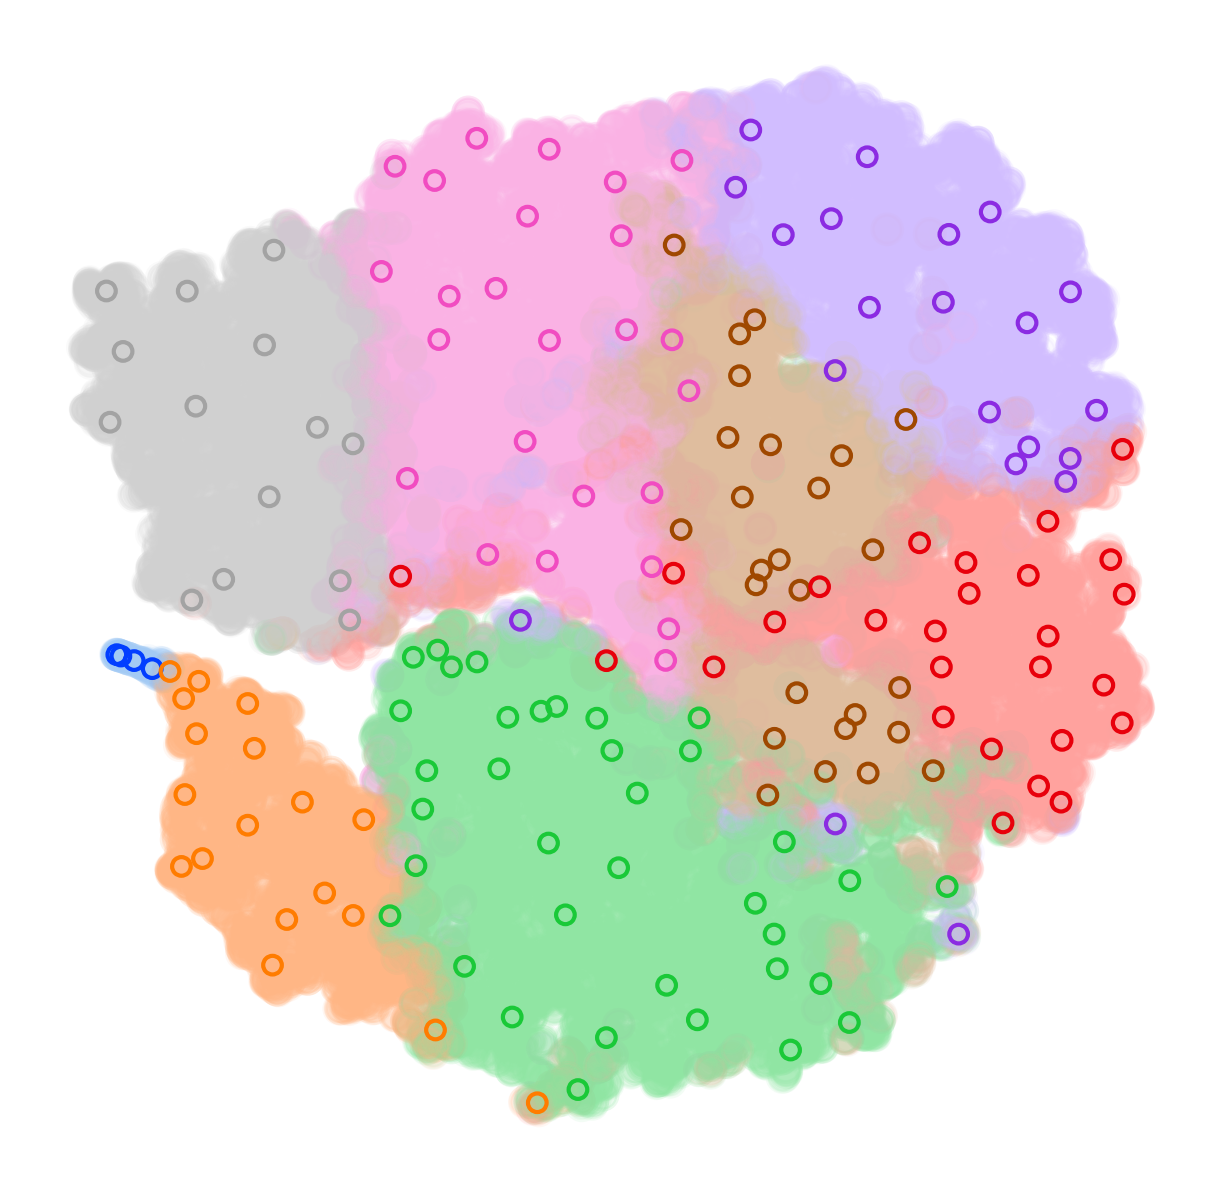

In [205]:
# mini map

fig = plt.figure(figsize=(5, 5), dpi=300)
ax = fig.gca()
ax.axis("off")
ax.set_aspect("equal")
scatter1 = ax.scatter(
    df["tsne0"],
    df["tsne1"],
    marker=".",
    s=200,
    c=df["cluster0"],
    cmap=ListedColormap(sns.color_palette("pastel", 8)),
    alpha=0.1,
)

color = ListedColormap(sns.color_palette("bright", 8))(df_rep["cluster0"])
scatter3 = ax.scatter(
    df_rep["tsne0"],
    df_rep["tsne1"],
    marker="o",
    s=20,
    lw=1,
    edgecolors=color,
    facecolors="none",
    alpha=1,
)

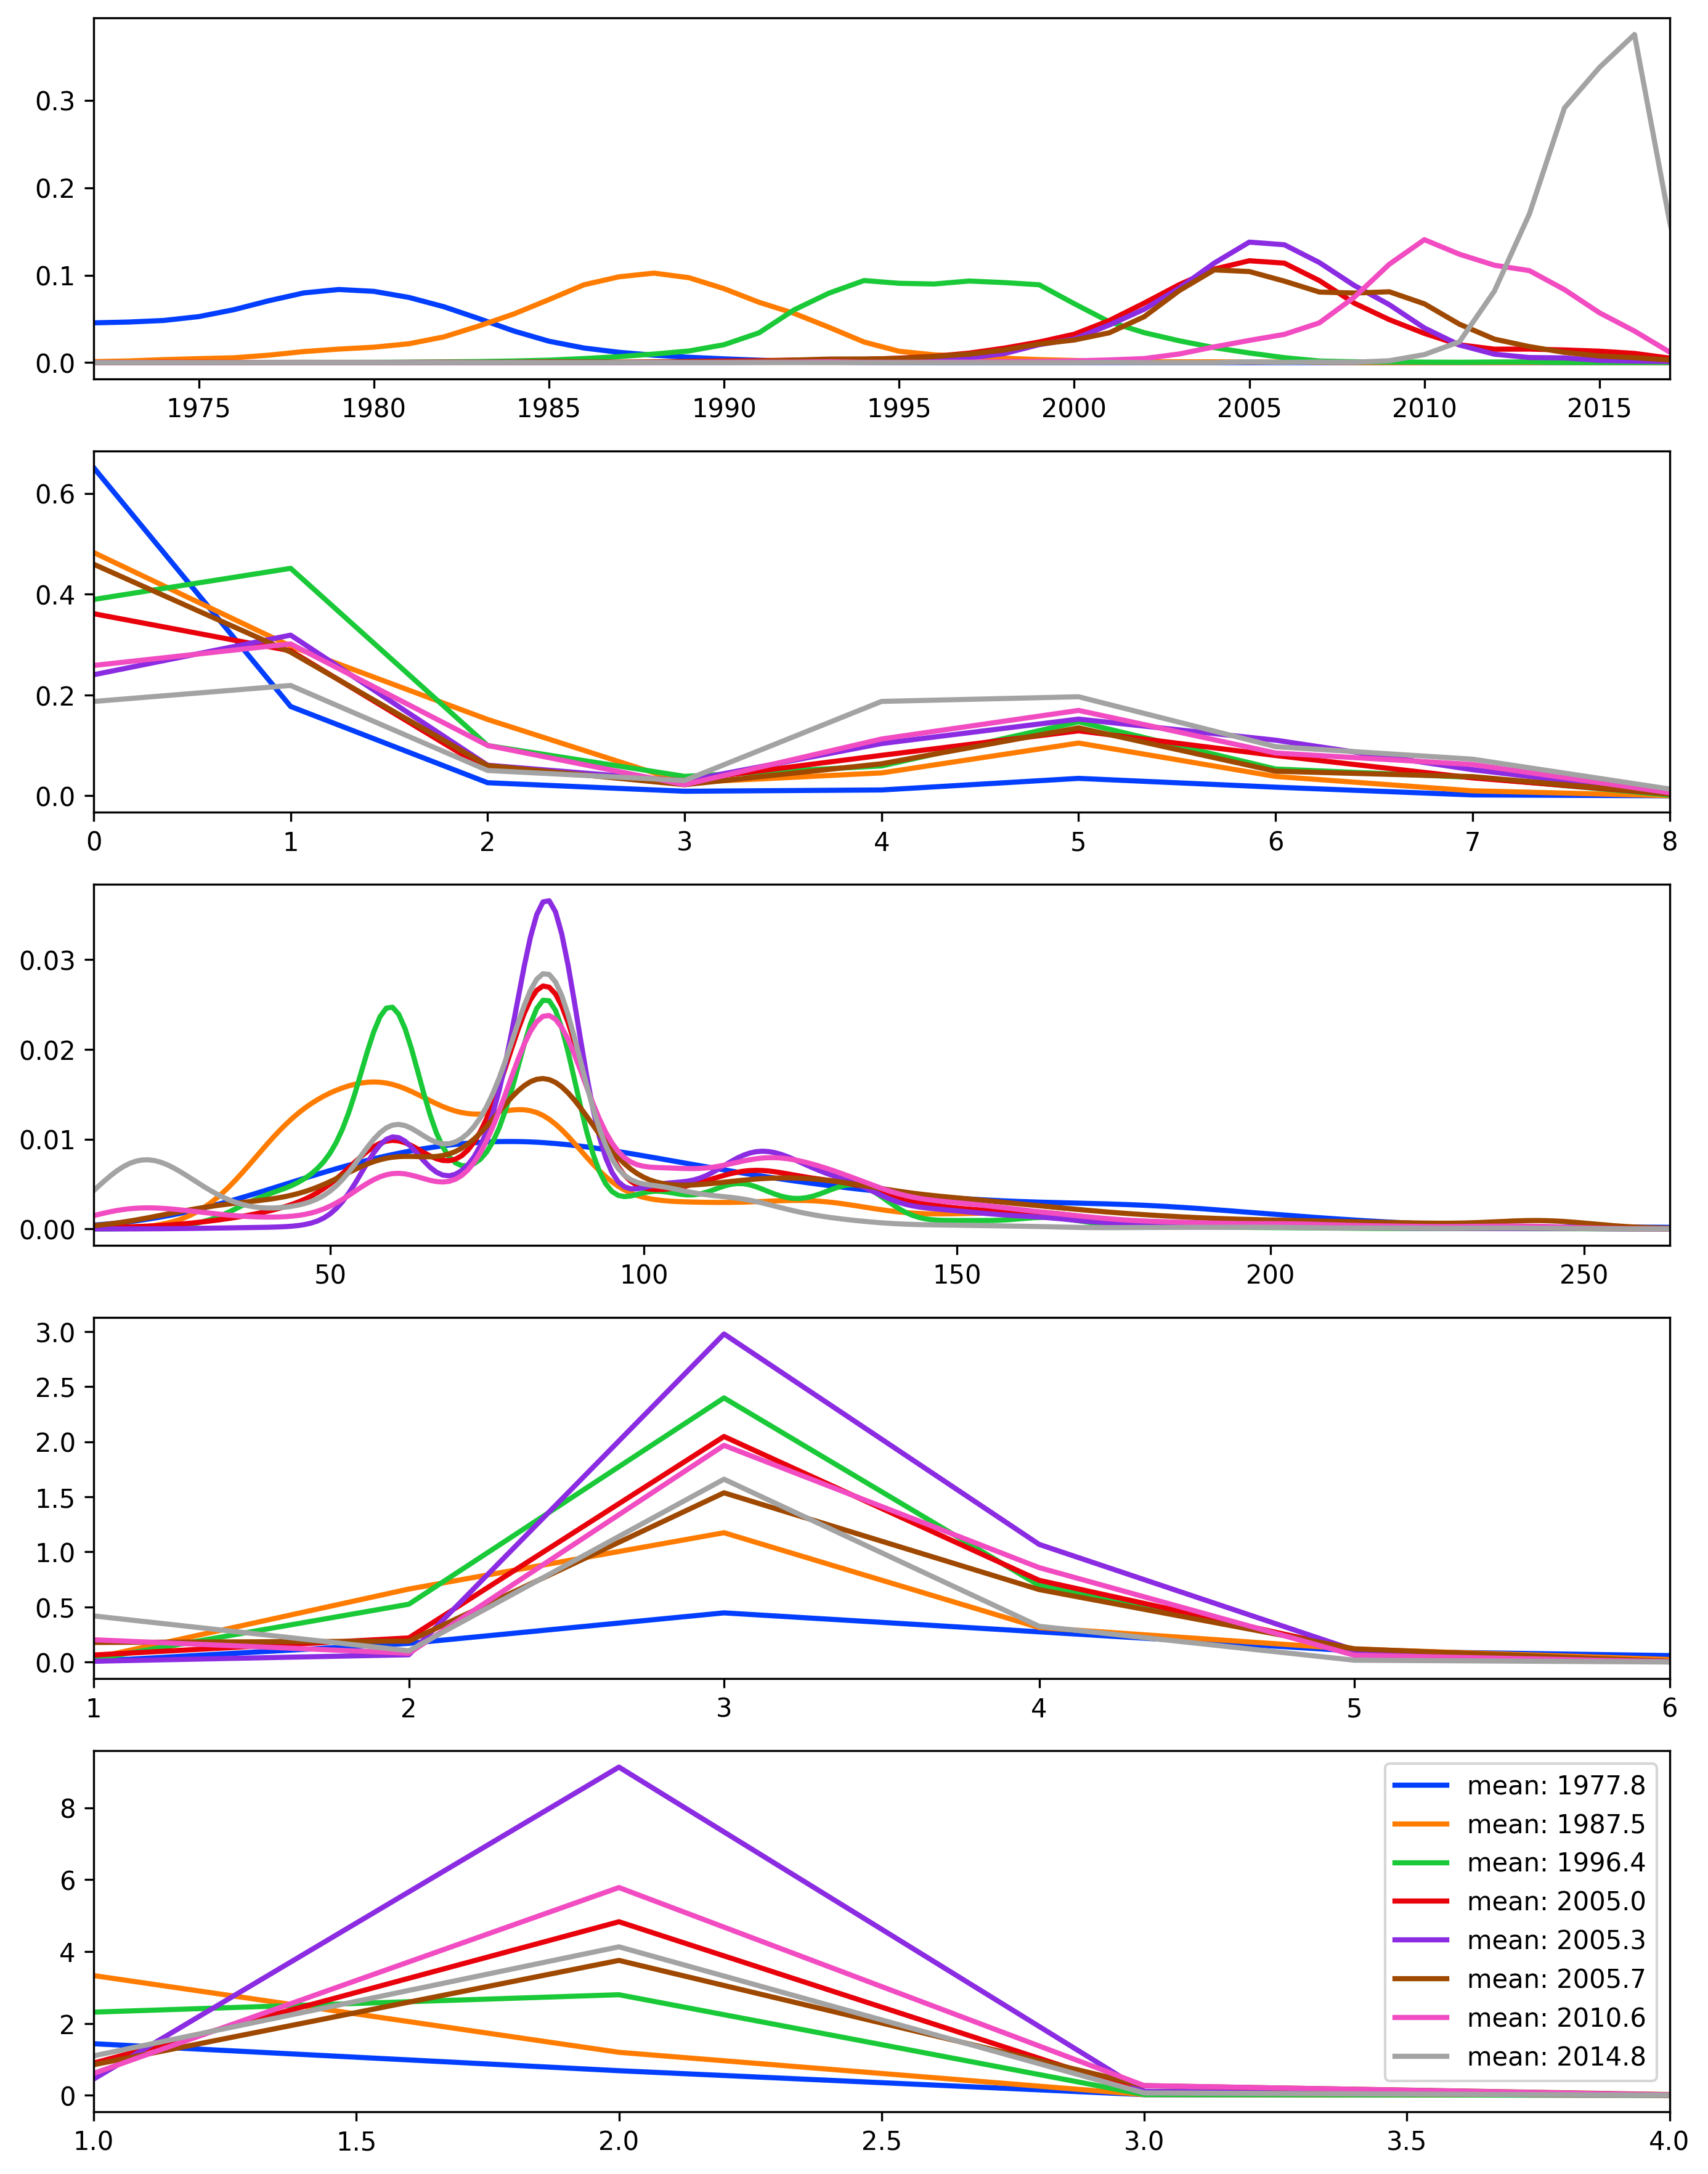

In [25]:
col_cluster = "cluster0"
n_cluster = df[col_cluster].max() + 1

colors = sns.color_palette("bright", n_cluster)

columns = ["year", "sido_cluster_code", "Area", "Rooms", "Baths"]

labels = [
    "Year",
    "Region",
    "Area of the housing unit",
    "Number of bedrooms",
    "Number of bathrooms",
]

fig, axes = plt.subplots(len(columns), figsize=(11, 15), dpi=300)

for i, col in enumerate(columns):
    ax = fig.sca(axes[i])
    #     df[col_factors].groupby(df['cluster0']).plot.kde(ax=ax)

    xlim = df[col].quantile([0.0005, 0.9995])
    ax.set_xlim(xlim)

    for c in range(n_cluster):
        #         if (3 <= c <= 5) or col == 'year':
        kernel = gaussian_kde(df[col].loc[df[col_cluster] == c])
        xs = np.arange(df[col].min(), df[col].max() + 0.001, 1)
        ys = kernel(xs)
        ax.plot(xs, ys, c=colors[c], linewidth=2, alpha=1)

avg_years = df["year"].groupby(df[col_cluster]).mean()
axes[-1].legend([f"mean: {avg}" for avg in avg_years.map("{:.1f}".format)])